## Automated Data Extraction from Website API 

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '48464404-a470-4a00-bca3-f63d981c1243',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
# changed the limit=1e10 to pull the data
# used the command "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

{'status': {'timestamp': '2023-08-08T17:21:03.435Z', 'error_code': 0, 'error_message': None, 'elapsed': 94, 'credit_count': 1, 'notice': None, 'total_count': 9754}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10386, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None) # to display maximum columns

In [4]:
df= pd.json_normalize(data['data']) # normalizing the data and displaying in a data frame
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.945154e+07,1.945154e+07,False,NaN,1,NaN,NaN,None,2023-08-08T17:19:00.000Z,29812.108301,1.547091e+10,30.5151,0.803408,3.057190,2.987138,-1.565654,12.531659,9.281718,5.798913e+11,49.0112,6.260543e+11,None,2023-08-08T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 13:21:11.317119
1,1027,Ethereum,ETH,ethereum,7223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201592e+08,1.201592e+08,True,NaN,2,NaN,NaN,None,2023-08-08T17:19:00.000Z,1855.061693,5.352488e+09,6.1432,0.588178,2.183984,1.068772,-0.504122,0.755133,1.999920,2.229028e+11,18.8655,2.229028e+11,None,2023-08-08T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 13:21:11.317119
2,825,Tether USDt,USDT,tether,59129,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.357864e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-08T17:19:00.000Z,0.999291,2.363802e+10,9.6001,-0.017553,0.068653,-0.001584,-0.088662,-0.053460,-0.101192,8.351934e+10,7.0695,8.662276e+10,None,2023-08-08T17:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 13:21:11.317119
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538537e+08,1.538537e+08,False,NaN,4,NaN,NaN,None,2023-08-08T17:19:00.000Z,245.032575,4.453781e+08,9.4086,0.113211,1.823884,-0.247082,4.558260,-6.487749,-21.244128,3.769916e+10,3.1907,3.769916e+10,None,2023-08-08T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 13:21:11.317119
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.274129e+10,9.998854e+10,False,NaN,5,NaN,NaN,None,2023-08-08T17:19:00.000Z,0.639934,1.221729e+09,-7.7830,1.463010,5.244555,-7.674363,36.362206,20.607703,51.298950,3.375096e+10,2.8560,6.399344e+10,None,2023-08-08T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 13:21:11.317119
5,3408,USD Coin,USDC,usd-coin,13548,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.614844e+10,2.614844e+10,False,NaN,6,NaN,NaN,None,2023-08-08T17:19:00.000Z,1.000201,3.028277e+09,11.8544,-0.019010,0.031975,0.024636,0.021756,0.023654,0.041767,2.615370e+10,2.2105,2.615370e+10,None,2023-08-08T17:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-08 13:21:11.317119
6,74,Dogecoin,DOGE,dogecoin,765,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.405079e+11,1.405079e+11,True,NaN,7,NaN,NaN,None,2023-08-08T17:19:00.000Z,0.075192,2.886965e+08,-17.8486,0.828749,3.156560,-2.197002,14.635372,9.146981,4.251781,1.056505e+10,0.8942,1.056505e+10,None,2023-08-08T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 13:21:11.317119
7,2010,Cardano,ADA,cardano,889,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.502769e+10,3.604578e+10,False,NaN,8,NaN,NaN,None,2023-08-08T17:19:00.000Z,0.297135,2.772020e+08,14.1049,0.490482,3.676542,-2.507366,4.045262,-3.321815,-18.916307,1.040796e+10,0.8810,1.337108e+10,None,2023-08-08T17:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 13:21:11.317119
8,5426,Solana,SOL,solana,496,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.057470e+08,5.

In [47]:
def calling_api():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
                  }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '48464404-a470-4a00-bca3-f63d981c1243',
              }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    df2= pd.json_normalize(data['data']) # normalizing the data and displaying in a data frame
    df2['timestamp']=pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=False)
    #df= pd.json_normalize(data['data']) # normalizing the data and displaying in a data frame
    #df['timestamp']=pd.to_datetime('now')
    #df

In [48]:
import os
from time import time
from time import sleep

for i in range(333):
    calling_api()
    print('API call successfull')
    sleep(60) #sleep for 1 minute 
exit()

API call successfull
API call successfull
API call successfull
API call successfull
API call successfull
API call successfull


KeyboardInterrupt: 

In [22]:
pd.set_option('display.float_format',lambda x:'%.5f'%x) #converting exponential values to float format

In [50]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10386,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19451537.00000,19451537.00000,False,NaN,1,NaN,NaN,None,2023-08-08T18:03:00.000Z,29807.33662,15634124873.50033,28.18400,0.29836,2.90043,2.95084,-1.62089,12.52768,8.41378,579798511089.75232,49.02420,625954068970.72998,None,2023-08-08T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 14:04:46.022948
1,1027,Ethereum,ETH,ethereum,7223,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120159238.27993,120159238.27993,True,NaN,2,NaN,NaN,None,2023-08-08T18:03:00.000Z,1853.94978,5173145533.22272,-2.91860,0.06064,2.21075,0.89395,-0.76033,0.71321,1.38759,222769193805.88693,18.83580,222769193805.89001,None,2023-08-08T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 14:04:46.022948
2,825,Tether USDt,USDT,tether,59129,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83578639639.68036,86684257831.30505,True,NaN,3,NaN,NaN,None,2023-08-08T18:03:00.000Z,0.99951,23637083446.74613,6.69580,0.00297,0.06699,0.02235,-0.07137,-0.04312,-0.12686,83537376802.13217,7.06420,86641461747.71001,None,2023-08-08T18:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-08 14:04:46.022948
3,1839,BNB,BNB,bnb,1559,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153853677.85131,153853677.85131,False,NaN,4,NaN,NaN,None,2023-08-08T18:03:00.000Z,245.10031,449309273.94981,10.84920,0.09180,1.87302,-0.12897,4.37704,-6.38116,-21.50136,37709584190.14525,3.18850,37709584190.15000,None,2023-08-08T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 14:04:46.022948
4,52,XRP,XRP,xrp,1026,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52741286353.00000,99988538151.00000,False,NaN,5,NaN,NaN,None,2023-08-08T18:03:00.000Z,0.63905,1219444259.37780,-9.80900,0.15279,5.08542,-8.01704,35.79675,19.91763,51.19440,33704419643.64435,2.84970,63905190741.95000,None,2023-08-08T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 14:04:46.022948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,3890,Polygon,MATIC,polygon,799,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",10000000000.00000,9319469069.28493,10000000000.00000,False,NaN,11,NaN,NaN,None,2023-08-08T18:50:00.000Z,0.68884,310504448.28153,6.53250,0.11740,4.29825,0.44650,-0.80915,-6.58946,-20.61328,6419598734.02898,0.54130,6888373883.00000,None,2023-08-08T18:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 14:51:53.864975
11,2,Litecoin,LTC,litecoin,967,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,73519601.72744,84000000.00000,False,NaN,12,NaN,NaN,None,2023-08-08T18:50:00.000Z,84.49077,437679784.45111,24.59980,-0.10615,3.60212,-9.29267,-12.79058,-5.65724,5.27561,6211727532.36532,0.52380,7097224419.86000,None,2023-08-08T18:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-08 14:51:53.864975
12,6636,Polkadot,DOT,polkadot-new,553,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1213573809.58019,1343052686.88537,True,NaN,13,NaN,NaN,None,2023-08-08T18:50:00.000Z,5.06332,89496853.31505,-9.33200,0.07382,2.47987,-1.30918,-0.46178,1.54

In [24]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,0.29836,2.90043,2.95084,-1.62089
Ethereum,0.06064,2.21075,0.89395,-0.76033
Tether USDt,0.00297,0.06699,0.02235,-0.07137
BNB,0.09180,1.87302,-0.12897,4.37704
XRP,0.15279,5.08542,-8.01704,35.79675
USD Coin,-0.00562,0.01814,0.02692,0.02419
Dogecoin,0.38340,3.30817,-2.21901,14.36800
Cardano,1.47219,5.00427,-1.17892,5.15585
Solana,0.65744,6.08901,3.36032,13.15624


In [32]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.29836
             quote.USD.percent_change_24h     2.90043
             quote.USD.percent_change_7d      2.95084
             quote.USD.percent_change_30d    -1.62089
Ethereum     quote.USD.percent_change_1h      0.06064
             quote.USD.percent_change_24h     2.21075
             quote.USD.percent_change_7d      0.89395
             quote.USD.percent_change_30d    -0.76033
Tether USDt  quote.USD.percent_change_1h      0.00297
             quote.USD.percent_change_24h     0.06699
             quote.USD.percent_change_7d      0.02235
             quote.USD.percent_change_30d    -0.07137
BNB          quote.USD.percent_change_1h      0.09180
             quote.USD.percent_change_24h     1.87302
             quote.USD.percent_change_7d     -0.12897
             quote.USD.percent_change_30d     4.37704
XRP          quote.USD.percent_change_1h      0.15279
             quote.USD.percent_change_24

In [33]:
df4=df4.to_frame(name='values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.29836
            quote.USD.percent_change_24h   2.90043
            quote.USD.percent_change_7d    2.95084
            quote.USD.percent_change_30d  -1.62089
Ethereum    quote.USD.percent_change_1h    0.06064
            quote.USD.percent_change_24h   2.21075
            quote.USD.percent_change_7d    0.89395
            quote.USD.percent_change_30d  -0.76033
Tether USDt quote.USD.percent_change_1h    0.00297
            quote.USD.percent_change_24h   0.06699
            quote.USD.percent_change_7d    0.02235
            quote.USD.percent_change_30d  -0.07137
BNB         quote.USD.percent_change_1h    0.09180
            quote.USD.percent_change_24h   1.87302
            quote.USD.percent_change_7d   -0.12897
            quote.USD.percent_change_30d   4.37704
XRP         quote.USD.percent_change_1h    0.15279
            quote.USD.percent_change_24h   5.08542
            quote.USD.percent_change_7d   -8.01704
            quote.USD.percent_change_30d  35.79675
USD Coin    quote.USD.percent_change_1h   -0.00562
            quote.USD.percent_change_24h   0.01814
            quote.USD.percent_change_7d    0.02692
            quote.USD.percent_change_30d   0.02419
Dogecoin    quote.USD.percent_change_1h    0.38340
            quote.USD.percent_change_24h   3.30817
            quote.USD.percent_change_7d   -2.21901
            quote.USD.percent_change_30d  14.36800
Cardano     quote.USD.percent_change_1h    1.47219
            quote.USD.percent_change_24h   5.00427
            quote.USD.percent_change_7d   -1.17892
            quote.USD.percent_change_30d   5.15585
Solana      quote.USD.percent_change_1h    0.65744
            quote.USD.percent_change_24h   6.08901
            quote.USD.percent_change_7d    3.36032
            quote.USD.percent_change_30d  13.15624
TRON        quote.USD.percent_change_1h    0.00707
            quote.USD.percent_change_24h   0.68190
            quote.USD.percent_change_7d   -1.79983
            quote.USD.percent_change_30d  -1.84178
Polygon     quote.USD.percent_change_1h    0.11048
            quote.USD.percent_change_24h   4.82797
            quote.USD.percent_change_7d    1.05211
            quote.USD.percent_change_30d  -1.06934
Polkadot    quote.USD.percent_change_1h    0.04701
            quote.USD.percent_change_24h   2.96135
            quote.USD.percent_change_7d   -0.71038
            quote.USD.percent_change_30d  -0.59661
Litecoin    quote.USD.percent_change_1h   -0.45726
            quote.USD.percent_change_24h   4.49631
            quote.USD.percent_change_7d   -9.09969
            quote.USD.percent_change_30d -12.66361
Shiba Inu   quote.USD.percent_change_1h    2.21966
            quote.USD.percent_change_24h   7.70938
            quote.USD.percent_change_7d   16.23297
            quote.USD.percent_change_30d  25.09910
Dai         quote.USD.percent_change_1h   -0.05132
            quote.USD.percent_change_24h   0.03828
            quote.USD.percent_change_7d    0.04645
            quote.USD.percent_change_30d   0.05045

In [34]:
df4.count()

values    60
dtype: int64

In [35]:
index=pd.Index(range(60))
df4=df4.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.29836
1,Bitcoin,quote.USD.percent_change_24h,2.90043
2,Bitcoin,quote.USD.percent_change_7d,2.95084
3,Bitcoin,quote.USD.percent_change_30d,-1.62089
4,Ethereum,quote.USD.percent_change_1h,0.06064
5,Ethereum,quote.USD.percent_change_24h,2.21075
6,Ethereum,quote.USD.percent_change_7d,0.89395
7,Ethereum,quote.USD.percent_change_30d,-0.76033
8,Tether USDt,quote.USD.percent_change_1h,0.00297
9,Tether USDt,quote.USD.percent_change_24h,0.06699


In [36]:
df4=df4.rename(columns={'level_1':'percent_change'})
df4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.29836
1,Bitcoin,quote.USD.percent_change_24h,2.90043
2,Bitcoin,quote.USD.percent_change_7d,2.95084
3,Bitcoin,quote.USD.percent_change_30d,-1.62089
4,Ethereum,quote.USD.percent_change_1h,0.06064
5,Ethereum,quote.USD.percent_change_24h,2.21075
6,Ethereum,quote.USD.percent_change_7d,0.89395
7,Ethereum,quote.USD.percent_change_30d,-0.76033
8,Tether USDt,quote.USD.percent_change_1h,0.00297
9,Tether USDt,quote.USD.percent_change_24h,0.06699


In [39]:
df4['percent_change']=df4['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df4['percent_change']=df4['percent_change'].replace(['quote.USD.percent_change_24h'],['24hr'])
df4['percent_change']=df4['percent_change'].replace(['quote.USD.percent_change_7d'],['7days'])
df4['percent_change']=df4['percent_change'].replace(['quote.USD.percent_change_30d'],['30days'])

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

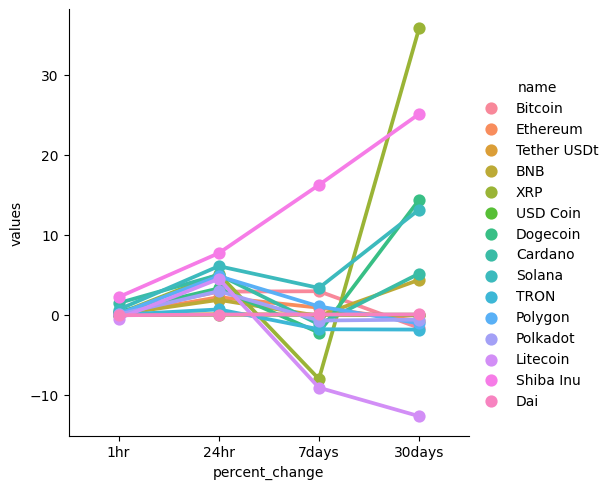

In [41]:
sns.catplot(x='percent_change',y='values',hue='name',data=df4,kind='point')

In [56]:
df5=df[['name','quote.USD.price','timestamp']]
df5=df5.query("name=='Bitcoin'")
df5

,name,quote.USD.price,timestamp
0,Bitcoin,29807.33662,2023-08-08 14:04:46.022948
0,Bitcoin,29856.80563,2023-08-08 14:46:52.178975
0,Bitcoin,29854.63118,2023-08-08 14:47:52.340522
0,Bitcoin,29850.38134,2023-08-08 14:48:53.344019
0,Bitcoin,29825.25477,2023-08-08 14:49:53.507767
0,Bitcoin,29773.65288,2023-08-08 14:50:53.714492
0,Bitcoin,29775.42805,2023-08-08 14:51:53.864975


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

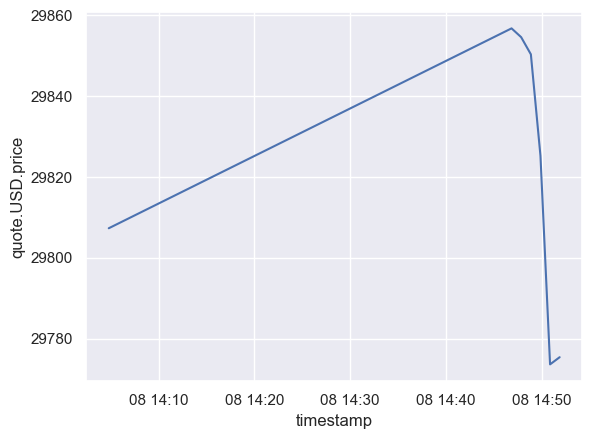

In [57]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price', data=df5)